In [19]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import collections
from collections import Counter
import seaborn as sns

In [38]:
def collect_metrics(root_dir):

    depth = 2

    dict_res_roberta = dict()
    dict_res_camem = dict()
    dict_res_xlm = dict()
    
    for subdir, dirs, files in os.walk(root_dir):
        if subdir[len(root_dir):].count(os.sep) < depth:
            for file_ in files:
                if file_ == "xai_metrics.json":
                    with open(subdir + "/" + file_) as f:
                        d = json.load(f)
                        reg_log_odd = d["reg_log_odd"]
                        reg_anti_log_odd = d["reg_anti_log_odd"]
                        
                    model_type = subdir.split(os.sep)[-1].split("_")[0]
                    if model_type == "roberta":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_roberta[dataset_name] = {"reg log odd": reg_log_odd, "reg anti log odd": reg_anti_log_odd}
                    elif model_type == "camem":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_camem[dataset_name] = {"reg log odd": reg_log_odd, "reg anti log odd": reg_anti_log_odd}
                    elif model_type == "xlm":
                        dataset_name = " ".join(subdir.split(os.sep)[-1].split("_")[1:])
                        dict_res_xlm[dataset_name] = {"reg log odd": reg_log_odd, "reg anti log odd": reg_anti_log_odd}

    return dict(sorted(dict_res_roberta.items())), dict(sorted(dict_res_camem.items())), dict(sorted(dict_res_xlm.items()))

def _average_dicts(dicts):
    avg_dict = collections.defaultdict(lambda: 0)
    
    for i, d in enumerate(dicts):
        for k, v in d.items():
            avg_dict[k] += v
        
    for k, v in avg_dict.items():
        avg_dict[k] /= (i+1)
    
    return avg_dict

def average_over_users(res):
    averaged_en = collections.defaultdict(list)
    averaged_it = collections.defaultdict(list)

    for k, v in res.items():
        if "en" in k and not ("nf" in k):
            averaged_en[" ".join(k.split(" ")[0:2])].append(v)
        elif "it" in k and not ("nf" in k):
            averaged_it[" ".join(k.split(" ")[0:2])].append(v)
    
    result_en = dict()
    result_it = dict()
            
    for k, v in averaged_en.items():
        result_en["avg en " + k] = _average_dicts(v)
        
    for k, v in averaged_it.items():
        result_it["avg it " + k] = _average_dicts(v)
                        
    return result_en, result_it

def process_to_present(res, column_width="1.1cm", plot_transpose=True):
    df_res = pd.DataFrame.from_dict(res).T
    # df_res = df_res.rename(columns=mapping_columns_names)
    if not plot_transpose:
        df_res = df_res.T
    s = df_res.style
    s.format(na_rep='MISS', precision=2)
    print(s.to_latex(column_format='l'+('p{'+f'{column_width}'+'}')*len(df_res.columns)))
    
    
def divide_lang(res):
    out_en = {}
    out_it = {}
    
    for k, v in res.items():
        if "en" in k:
            out_en[k] = v
        else:
            out_it[k] = v
            
    return out_en, out_it


def divide_p_np(res):
    out_p = {}
    out_np = {}
    
    for k, v in res.items():
        if "np" in k:
            out_np[k] = v
        else:
            out_p[k] = v
            
    return out_p, out_np  

In [14]:
dict_res_roberta, dict_res_camem, dict_res_xlm = collect_metrics("../output/complexity_10_50")

## ROBERTA

In [15]:
avg, _ = average_over_users(dict_res_roberta)
roberta_results = {**dict_res_roberta, ** avg}

In [16]:
pd.DataFrame(roberta_results).T

,reg log odd,reg anti log odd
np f en49,0.050524,0.969469
np f en57,0.050132,1.000946
np f en6,0.164089,0.374693
np f en83,0.140064,1.105205
np f en98,0.053310,0.896614
np nf en,0.050095,1.215681
p f en49,0.085953,0.218740
p f en57,0.107597,0.279033
p f en6,0.109399,0.321362
p f en83,0.097590,0.243928


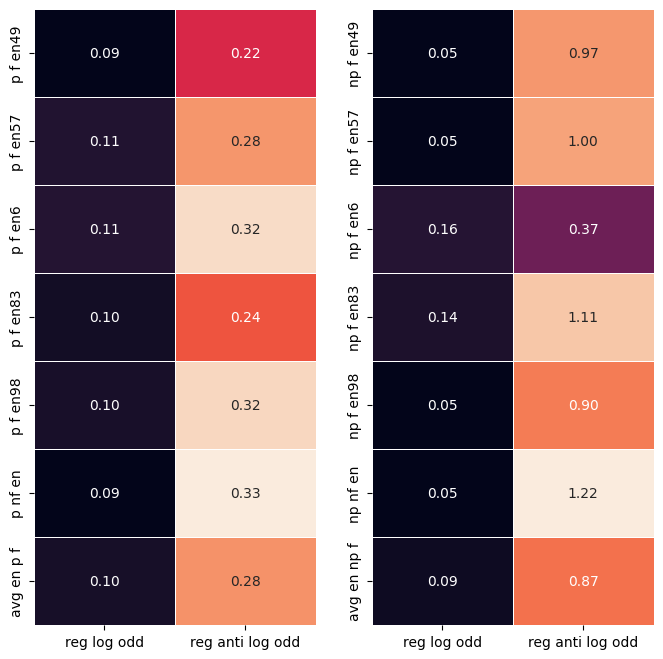

In [53]:
roberta_res_p, roberta_res_np = divide_p_np(roberta_results)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
sns.heatmap(pd.DataFrame(roberta_res_p).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax1)
sns.heatmap(pd.DataFrame(roberta_res_np).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax2)
plt.show()

In [17]:
process_to_present(roberta_results)

\begin{tabular}{lp{1.1cm}p{1.1cm}}
 & reg log odd & reg anti log odd \\
np f en49 & 0.05 & 0.97 \\
np f en57 & 0.05 & 1.00 \\
np f en6 & 0.16 & 0.37 \\
np f en83 & 0.14 & 1.11 \\
np f en98 & 0.05 & 0.90 \\
np nf en & 0.05 & 1.22 \\
p f en49 & 0.09 & 0.22 \\
p f en57 & 0.11 & 0.28 \\
p f en6 & 0.11 & 0.32 \\
p f en83 & 0.10 & 0.24 \\
p f en98 & 0.10 & 0.32 \\
p nf en & 0.09 & 0.33 \\
avg en np f & 0.09 & 0.87 \\
avg en p f & 0.10 & 0.28 \\
\end{tabular}



## CAMEM

In [30]:
_, avg = average_over_users(dict_res_camem)
camem_results = {**dict_res_camem, ** avg}

In [31]:
pd.DataFrame(camem_results).T

,reg log odd,reg anti log odd
np f it1,0.287339,0.617103
np f it26,0.335181,0.956257
np f it38,0.160101,1.043719
np f it43,0.201940,1.012082
np f it44,0.441073,0.335317
np nf it,0.245296,0.729543
p f it1,0.153860,0.355259
p f it26,0.139998,0.274145
p f it38,0.086263,0.419557
p f it43,0.132620,0.336977


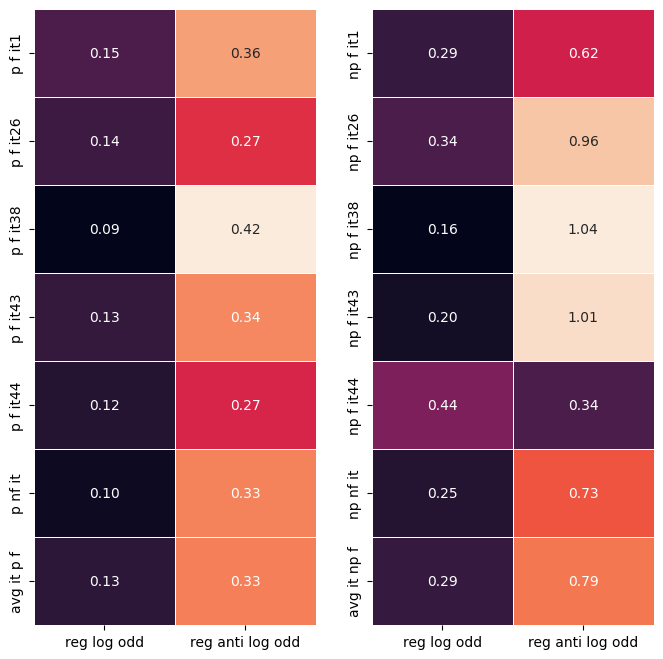

In [54]:
camem_res_p, camem_res_np = divide_p_np(camem_results)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,8))
sns.heatmap(pd.DataFrame(camem_res_p).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax1)
sns.heatmap(pd.DataFrame(camem_res_np).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax2)
plt.show()

In [33]:
process_to_present(camem_results)

\begin{tabular}{lp{1.1cm}p{1.1cm}}
 & reg log odd & reg anti log odd \\
np f it1 & 0.29 & 0.62 \\
np f it26 & 0.34 & 0.96 \\
np f it38 & 0.16 & 1.04 \\
np f it43 & 0.20 & 1.01 \\
np f it44 & 0.44 & 0.34 \\
np nf it & 0.25 & 0.73 \\
p f it1 & 0.15 & 0.36 \\
p f it26 & 0.14 & 0.27 \\
p f it38 & 0.09 & 0.42 \\
p f it43 & 0.13 & 0.34 \\
p f it44 & 0.12 & 0.27 \\
p nf it & 0.10 & 0.33 \\
avg it np f & 0.29 & 0.79 \\
avg it p f & 0.13 & 0.33 \\
\end{tabular}



## XLM

In [34]:
avg_en, avg_it = average_over_users(dict_res_xlm)
xlm_results = {**dict_res_xlm, **avg_en, **avg_it}

In [35]:
pd.DataFrame(xlm_results).T

,reg log odd,reg anti log odd
np f en49,0.109308,0.847361
np f en57,0.067517,1.359266
np f en6,0.123844,0.792190
np f en83,0.113018,0.787249
np f en98,0.159341,0.629315
np f it1,0.152971,0.787428
np f it26,0.203026,0.549440
np f it38,0.181839,0.508651
np f it43,0.130213,1.611800
np f it44,0.157572,0.943458


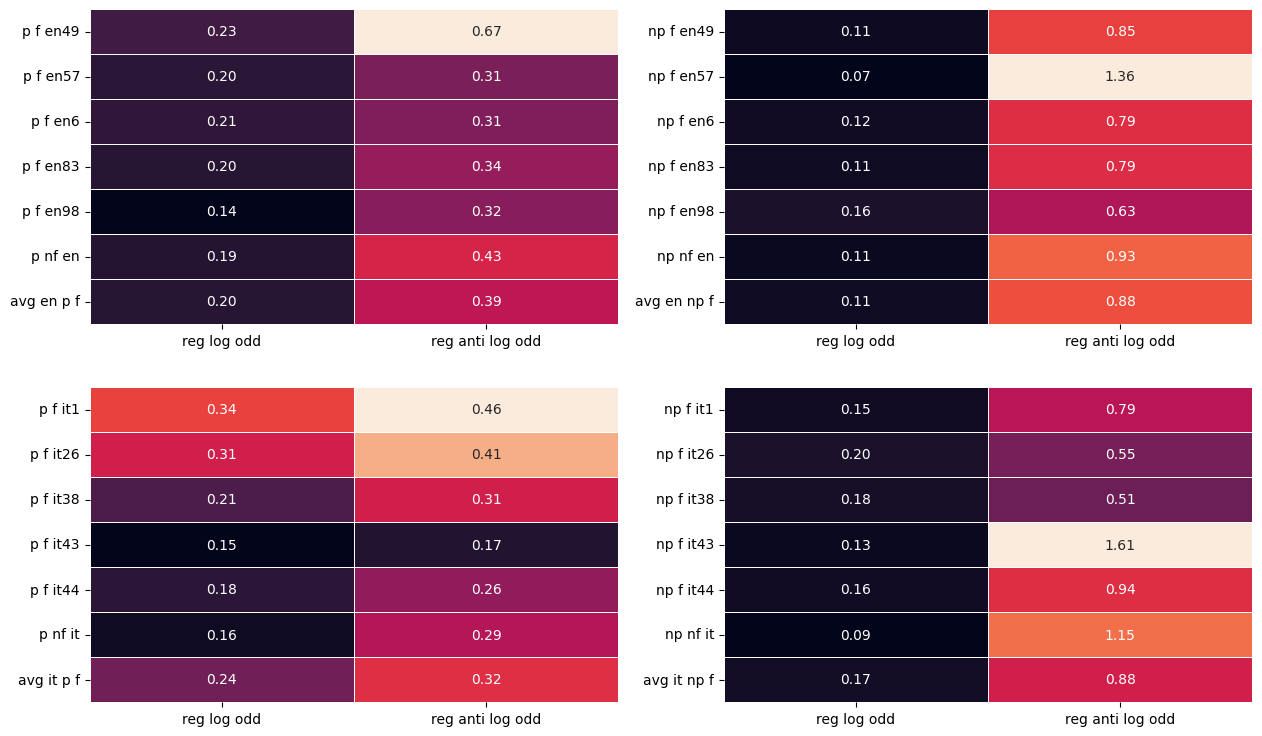

In [62]:
xlm_res_p, xlm_res_np = divide_p_np(xlm_results)
xlm_res_p_it, xlm_res_p_en = divide_lang(xlm_res_p)
xlm_res_np_it, xlm_res_np_en = divide_lang(xlm_res_np)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15,9))
sns.heatmap(pd.DataFrame(xlm_res_p_it).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax1)
sns.heatmap(pd.DataFrame(xlm_res_np_it).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax2)
sns.heatmap(pd.DataFrame(xlm_res_p_en).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax3)
sns.heatmap(pd.DataFrame(xlm_res_np_en).T, annot=True, fmt=".2f", linewidth=.5, cbar=False, ax=ax4)

plt.show()

In [12]:
process_to_present(xlm_results)

\begin{tabular}{lp{1.1cm}p{1.1cm}p{1.1cm}p{1.1cm}}
 & reg log odd & reg anti log odd & reg comp & reg suff \\
np f en49 & 0.11 & 0.85 & 0.00 & 0.00 \\
np f en57 & 0.07 & 1.36 & 0.00 & 0.00 \\
np f en6 & 0.12 & 0.79 & 0.00 & 0.00 \\
np f en83 & 0.11 & 0.79 & 0.00 & 0.00 \\
np f en98 & 0.16 & 0.63 & 0.00 & 0.00 \\
np f it1 & 0.15 & 0.79 & 0.00 & 0.00 \\
np f it26 & 0.20 & 0.55 & 0.00 & 0.00 \\
np f it38 & 0.18 & 0.51 & 0.00 & 0.00 \\
np f it43 & 0.13 & 1.61 & 0.00 & 0.00 \\
np f it44 & 0.16 & 0.94 & 0.00 & 0.00 \\
np nf en & 0.11 & 0.93 & 0.00 & 0.00 \\
np nf it & 0.09 & 1.15 & 0.00 & 0.00 \\
p f en49 & 0.23 & 0.67 & 0.00 & 0.00 \\
p f en57 & 0.20 & 0.31 & 0.00 & 0.00 \\
p f en6 & 0.21 & 0.31 & 0.00 & 0.00 \\
p f en83 & 0.20 & 0.34 & 0.00 & 0.00 \\
p f en98 & 0.14 & 0.32 & 0.00 & 0.00 \\
p f it1 & 0.34 & 0.46 & 0.00 & 0.00 \\
p f it26 & 0.31 & 0.41 & 0.00 & 0.00 \\
p f it38 & 0.21 & 0.31 & 0.00 & 0.00 \\
p f it43 & 0.15 & 0.17 & 0.00 & 0.00 \\
p f it44 & 0.18 & 0.26 & 0.00 & 0.00 \\
p nf